# Features from previous_application dataset

This notebook creates features from the previous_application dataset and displays the distribution of both categorical and numerical features. The POS_CASH_balance dataset contains information regarding previous applications for Home Credit loans by clients in the application dataframe.

In [1]:
# Importing main modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
%matplotlib inline
pd.set_option('display.max_columns', 2000)

# Defining standard plot options
sns.set(font_scale=1.4)
sns.set_style("white")

# Reverting to old color palette
pal = sns.color_palette("deep")
pal = pal.as_hex()
pal[1], pal[2], pal[3] = pal[2], pal[3], pal[1]
sns.set_palette(pal)

In [2]:
# Loading application dataframe from csv file 
application = pd.read_csv("./data/application.csv")

In [3]:
# Reading data files into csv format
previous_application = pd.read_csv("./data/previous_application.csv")
homecredit_columns_description = pd.read_csv("./data/homecredit_columns_description.csv", encoding="ISO-8859-1")

In [4]:
# Description of columns in previous_application dataset
description_application = homecredit_columns_description[homecredit_columns_description["Table"] == "previous_application.csv"]
for index, row in description_application.iterrows():
    print(row["Row"], row["Description"])

previous_application.head(20)

SK_ID_PREV  ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) 
SK_ID_CURR ID of loan in our sample
NAME_CONTRACT_TYPE Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
AMT_ANNUITY Annuity of previous application
AMT_APPLICATION For how much credit did client ask on the previous application
AMT_CREDIT Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT
AMT_DOWN_PAYMENT Down payment on the previous application
AMT_GOODS_PRICE Goods price of good that client asked for (if applicable) on the previous application
WEEKDAY_APPR_PROCESS_START On which day of the week did the 

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Addition of encoded catergorical feature for yield group
previous_application["NAME_YIELD_GROUP_ENCODED"] = np.NaN
previous_application.loc[previous_application["NAME_YIELD_GROUP"] == "low_normal", "NAME_YIELD_GROUP_ENCODED"] = 1
previous_application.loc[previous_application["NAME_YIELD_GROUP"] == "low_action", "NAME_YIELD_GROUP_ENCODED"] = 2
previous_application.loc[previous_application["NAME_YIELD_GROUP"] == "middle", "NAME_YIELD_GROUP_ENCODED"] = 3
previous_application.loc[previous_application["NAME_YIELD_GROUP"] == "high", "NAME_YIELD_GROUP_ENCODED"] = 4

In [6]:
# Extraction of features from previous_application dataset

# Creating empty lists for each new feature
nb_previous_applications_list = []
nb_approved_app_list = []
nb_canceled_app_list = []
nb_refused_app_list = []
main_reason_refusal_list = []
nb_unused_app_list = []
avg_credit_granted_list = []
sum_credit_granted_list = []
avg_credit_requested_list = []
sum_credit_requested_list = []
ratio_credit_req_granted_list = []
avg_annuity_list = []
sum_annuity_list = []
ratio_avg_annuity_credit_list = []
avg_down_payment_list = []
sum_down_payment_list = []
ratio_down_credit_list = []
avg_goods_price_list = []
sum_goods_price_list = []
ratio_goods_price_credit_list = []
avg_days_decision_list = []
mode_accompanied_client_list = []
mode_client_type_list = []
mode_portfolio_list = []
nb_xsell_credit_list = []
nb_walkin_credit_list = []
mode_channel_type_list = []
mode_sellerplace_area_list = []
mode_seller_type_list = []
avg_nb_payments_list = []
sum_nb_payments_list = []
avg_yield_group_list = []
fr_insurance_req_list = []

counter = 0
lenght = len(application)
for index, row in application.iterrows():
    counter += 1
    sys.stdout.write('\r'+"Progress:"+str(round(counter/lenght*100,1))+"%")
    
    nb_previous_applications = 0
    nb_approved_app = 0
    nb_canceled_app = 0
    nb_refused_app = 0
    main_reason_refusal = np.NaN
    nb_unused_app = 0
    avg_credit_granted = np.NaN
    sum_credit_granted = 0
    avg_credit_requested = np.NaN
    sum_credit_requested = 0
    ratio_credit_req_granted = np.NaN
    avg_annuity = np.NaN
    sum_annuity = 0
    ratio_avg_annuity_credit = np.NaN
    avg_down_payment = np.NaN
    sum_down_payment = np.NaN
    ratio_down_credit = np.NaN
    avg_goods_price = np.NaN
    sum_goods_price = np.NaN
    ratio_goods_price_credit = np.NaN
    avg_days_decision = np.NaN
    mode_accompanied_client = np.NaN
    mode_client_type = np.NaN
    mode_portfolio = np.NaN
    nb_xsell_credit = 0
    nb_walkin_credit = 0
    mode_channel_type = np.NaN
    mode_sellerplace_area = np.NaN
    mode_seller_type = np.NaN
    avg_nb_payments = np.NaN
    sum_nb_payments = np.NaN
    avg_yield_group = np.NaN
    fr_insurance_req = np.NaN
    
    df = previous_application[previous_application["SK_ID_CURR"] == row["SK_ID_CURR"]]
    if len(df) > 0:
        # Number of past Home Credit applications
        nb_previous_applications = len(df)
        # Number of approved applications
        nb_approved_app = len(df[df["NAME_CONTRACT_STATUS"] == "Approved"])
        # Number of canceled applications
        nb_canceled_app = len(df[df["NAME_CONTRACT_STATUS"] == "Canceled"])
        # Number of refused applications
        nb_refused_app = len(df[df["NAME_CONTRACT_STATUS"] == "Refused"])
        if nb_refused_app > 0:
            main_reason_refusal = df[df["NAME_CONTRACT_STATUS"] == "Refused"]["CODE_REJECT_REASON"].mode().iloc[0]
        # Number of unused applications
        nb_unused_app = len(df["NAME_CONTRACT_STATUS"] == "Unused offer")
        # Average and sum of previous application credit granted
        avg_credit_granted = df[df["AMT_CREDIT"] > 0]["AMT_CREDIT"].mean()
        sum_credit_granted = df[df["AMT_CREDIT"] > 0]["AMT_CREDIT"].sum()
        # Average and sum of previous application credit requested
        avg_credit_requested = df[df["AMT_CREDIT"] > 0]["AMT_APPLICATION"].mean()
        sum_credit_requested = df[df["AMT_CREDIT"] > 0]["AMT_APPLICATION"].sum()
        # Average ratio between credit requested and granted
        if sum_credit_granted > 0:
            ratio_credit_req_granted = sum_credit_requested / sum_credit_granted
        # Average and sum of previous application annuity
        avg_annuity = df[df["AMT_CREDIT"] > 0]["AMT_ANNUITY"].mean()
        sum_annuity = df[df["AMT_CREDIT"] > 0]["AMT_ANNUITY"].sum()
        # Average ratio between annuity and credit
        if sum_credit_granted > 0: 
            ratio_avg_annuity_credit = sum_annuity / sum_credit_granted
        # Average and sum of down payment
        avg_down_payment = df[df["AMT_CREDIT"] > 0]["AMT_DOWN_PAYMENT"].mean()
        sum_down_payment = df[df["AMT_CREDIT"] > 0]["AMT_DOWN_PAYMENT"].sum()
        # Average ratio between down payment and credit
        if sum_credit_granted > 0:
            ratio_down_credit = sum_down_payment / sum_credit_granted
        # Average and sum of purchased goods price
        avg_goods_price = df[df["AMT_CREDIT"] > 0]["AMT_GOODS_PRICE"].mean()
        sum_goods_price = df[df["AMT_CREDIT"] > 0]["AMT_GOODS_PRICE"].sum()
        # Average ratio between goods price and credit
        if sum_credit_granted > 0:
            ratio_goods_price_credit = sum_goods_price / sum_credit_granted
        # Average days for decision on credit
        avg_days_decision = df["DAYS_DECISION"].mean()
        # Who accompanied client in most cases
        if len(df["NAME_TYPE_SUITE"].mode()) > 0:
            mode_accompanied_client = df["NAME_TYPE_SUITE"].mode().iloc[0]
        # Mode client type (Was the client old or new client when applying for the previous application)
        mode_client_type = df["NAME_CLIENT_TYPE"].mode().iloc[0]
        # Mode portfolio
        mode_portfolio = df["NAME_PORTFOLIO"].mode().iloc[0]
        # Number of x-sell credit products
        nb_xsell_credit = len(df[df["NAME_PRODUCT_TYPE"] == "x-sell"])
        # Number of walk-in credit products
        nb_walkin_credit = len(df[df["NAME_PRODUCT_TYPE"] == "walk-in"])
        # Main channel through which we acquired the client on the previous application
        mode_channel_type = df["CHANNEL_TYPE"].mode().iloc[0]
        # Main seller place area
        mode_sellerplace_area = df["SELLERPLACE_AREA"].mode().iloc[0]
        # Main type of seller for the credit application
        mode_seller_type = df["NAME_SELLER_INDUSTRY"].mode().iloc[0]
        # Average and total number of payments for previous application credit
        avg_nb_payments = df[df["AMT_CREDIT"] > 0]["CNT_PAYMENT"].mean()
        sum_nb_payments = df[df["AMT_CREDIT"] > 0]["CNT_PAYMENT"].sum()
        # Average yield group for previous application credit
        avg_yield_group = df["NAME_YIELD_GROUP_ENCODED"].mean()
        # Fraction of insurance requested
        fr_insurance_req = df["NFLAG_INSURED_ON_APPROVAL"].mean()
        
    
    nb_previous_applications_list.append(nb_previous_applications)
    nb_approved_app_list.append(nb_approved_app)
    nb_canceled_app_list.append(nb_canceled_app)
    nb_refused_app_list.append(nb_refused_app)
    main_reason_refusal_list.append(main_reason_refusal)
    nb_unused_app_list.append(nb_unused_app)
    avg_credit_granted_list.append(avg_credit_granted)
    sum_credit_granted_list.append(sum_credit_granted)
    avg_credit_requested_list.append(avg_credit_requested)
    sum_credit_requested_list.append(sum_credit_requested)
    ratio_credit_req_granted_list.append(ratio_credit_req_granted)
    avg_annuity_list.append(avg_annuity)
    sum_annuity_list.append(sum_annuity)
    ratio_avg_annuity_credit_list.append(ratio_avg_annuity_credit)
    avg_down_payment_list.append(avg_down_payment)
    sum_down_payment_list.append(sum_down_payment)
    ratio_down_credit_list.append(ratio_down_credit)
    avg_goods_price_list.append(avg_goods_price)
    sum_goods_price_list.append(sum_goods_price)
    ratio_goods_price_credit_list.append(ratio_goods_price_credit)
    avg_days_decision_list.append(avg_days_decision)
    mode_accompanied_client_list.append(mode_accompanied_client)
    mode_client_type_list.append(mode_client_type)
    mode_portfolio_list.append(mode_portfolio)
    nb_xsell_credit_list.append(nb_xsell_credit)
    nb_walkin_credit_list.append(nb_walkin_credit)
    mode_channel_type_list.append(mode_channel_type)
    mode_sellerplace_area_list.append(mode_sellerplace_area)
    mode_seller_type_list.append(mode_seller_type)
    avg_nb_payments_list.append(avg_nb_payments)
    sum_nb_payments_list.append(sum_nb_payments)
    avg_yield_group_list.append(avg_yield_group)
    fr_insurance_req_list.append(fr_insurance_req)   


Progress:100.0%

In [7]:
# Function to display description of selected feature
def add_description(table, row, description):
    list_description = [np.NaN, table, row, description, np.NaN]
    homecredit_columns_description.loc[len(homecredit_columns_description)] = list_description
    return homecredit_columns_description

In [8]:
# Creation of new features from previous_application dataset
application["nb_previous_applications_list"] = nb_previous_applications_list
add_description("previous_application.csv", "nb_previous_applications_list", "Number of past Home Credit applications")

application["nb_approved_app_list"] = nb_approved_app_list
add_description("previous_application.csv", "nb_approved_app_list", "Number of approved applications")

application["nb_canceled_app_list"] = nb_canceled_app_list
add_description("previous_application.csv", "nb_canceled_app_list", "Number of canceled applications")

application["nb_refused_app_list"] = nb_refused_app_list
add_description("previous_application.csv", "nb_refused_app_list", "Number of refused applications")

application["main_reason_refusal_list"] = main_reason_refusal_list
add_description("previous_application.csv", "main_reason_refusal_list", "Main reason for refusal (mode)")

application["nb_unused_app_list"] = nb_unused_app_list
add_description("previous_application.csv", "nb_unused_app_list", "Number of unused applications")

application["avg_credit_granted_list"] = avg_credit_granted_list
add_description("previous_application.csv", "avg_credit_granted_list", "Average of previous application credit granted")

application["sum_credit_granted_list"] = sum_credit_granted_list
add_description("previous_application.csv", "sum_credit_granted_list", "Sum of previous application credit granted")

application["avg_credit_requested_list"] = avg_credit_requested_list
add_description("previous_application.csv", "avg_credit_requested_list", "Average of previous application credit requested")

application["sum_credit_requested_list"] = sum_credit_requested_list
add_description("previous_application.csv", "sum_credit_requested_list", "Sum of previous application credit requested")

application["ratio_credit_req_granted_list"] = ratio_credit_req_granted_list
add_description("previous_application.csv", "ratio_credit_req_granted_list", "Average ratio between credit requested and granted")

application["avg_annuity_list"] = avg_annuity_list
add_description("previous_application.csv", "avg_annuity_list", "Average of previous application annuity")

application["sum_annuity_list"] = sum_annuity_list
add_description("previous_application.csv", "sum_annuity_list", "Sum of previous application annuity")

application["ratio_avg_annuity_credit_list"] = ratio_avg_annuity_credit_list
add_description("previous_application.csv", "ratio_avg_annuity_credit_list", "Average ratio between annuity and credit")

application["avg_down_payment_list"] = avg_down_payment_list
add_description("previous_application.csv", "avg_down_payment_list", "Average of down payment")

application["sum_down_payment_list"] = sum_down_payment_list
add_description("previous_application.csv", "sum_down_payment_list", "Sum of down payment")

application["ratio_down_credit_list"] = ratio_down_credit_list
add_description("previous_application.csv", "ratio_down_credit_list", "Average ratio between down payment and credit")

application["avg_goods_price_list"] = avg_goods_price_list
add_description("previous_application.csv", "avg_goods_price_list", "Average of purchased goods price")

application["sum_goods_price_list"] = sum_goods_price_list
add_description("previous_application.csv", "sum_goods_price_list", "Sum of purchased goods price")

application["ratio_goods_price_credit_list"] = ratio_goods_price_credit_list
add_description("previous_application.csv", "ratio_goods_price_credit_list", "Average ratio between goods price and credit")

application["avg_days_decision_list"] = avg_days_decision_list
add_description("previous_application.csv", "avg_days_decision_list", "Average days for decision on credit")

application["mode_accompanied_client_list"] = mode_accompanied_client_list
add_description("previous_application.csv", "mode_accompanied_client_list", "Who accompanied client in most cases")

application["mode_client_type_list"] = mode_client_type_list
add_description("previous_application.csv", "mode_client_type_list", "Mode client type (Was the client old or new client when applying for the previous application)")

application["mode_portfolio_list"] = mode_portfolio_list
add_description("previous_application.csv", "mode_portfolio_list", "Mode portfolio")

application["nb_xsell_credit_list"] = nb_xsell_credit_list
add_description("previous_application.csv", "nb_xsell_credit_list", "Number of x-sell credit products")

application["nb_walkin_credit_list"] = nb_walkin_credit_list
add_description("previous_application.csv", "nb_walkin_credit_list", "Number of walk-in credit products")

application["mode_channel_type_list"] = mode_channel_type_list
add_description("previous_application.csv", "mode_channel_type_list", "Main channel through which we acquired the client on the previous application")

application["mode_sellerplace_area_list"] = mode_sellerplace_area_list
add_description("previous_application.csv", "mode_sellerplace_area_list", "Main seller place area")

application["mode_seller_type_list"] = mode_seller_type_list
add_description("previous_application.csv", "mode_seller_type_list", "Main type of seller for the credit application")

application["avg_nb_payments_list"] = avg_nb_payments_list
add_description("previous_application.csv", "avg_nb_payments_list", "Average number of payments for previous application credit")

application["sum_nb_payments_list"] = sum_nb_payments_list
add_description("previous_application.csv", "sum_nb_payments_list", "Total number of payments for previous application credit")

application["avg_yield_group_list"] = avg_yield_group_list
add_description("previous_application.csv", "avg_yield_group_list", "Average yield group for previous application credit")

application["fr_insurance_req_list"] = fr_insurance_req_list
add_description("previous_application.csv", "fr_insurance_req_list", "Fraction of insurance requested");

In [9]:
# Saving application dataframe into csv file
application.to_csv("./data/application.csv",index=False)

In [10]:
# Saving homecredit_columns_description dataframe into csv file
homecredit_columns_description.to_csv("./data/homecredit_columns_description.csv",index=False)

In [11]:
discrete_features = ["main_reason_refusal_list", "mode_accompanied_client_list", "mode_client_type_list", \
                     "mode_portfolio_list", "mode_channel_type_list", "mode_seller_type_list"]

continuous_features = ["avg_credit_granted_list", "sum_credit_granted_list", "avg_credit_requested_list", \
                       "sum_credit_requested_list", "ratio_credit_req_granted_list", "avg_annuity_list", \
                       "sum_annuity_list", "ratio_avg_annuity_credit_list", "avg_down_payment_list", \
                       "sum_down_payment_list", "ratio_down_credit_list", "avg_goods_price_list", \
                       "sum_goods_price_list", "ratio_goods_price_credit_list", "avg_days_decision_list", \
                       "mode_sellerplace_area_list", "avg_nb_payments_list", "sum_nb_payments_list", \
                       "avg_yield_group_list", "fr_insurance_req_list", "nb_previous_applications_list", \
                       "nb_approved_app_list", "nb_canceled_app_list", "nb_refused_app_list", \
                       "nb_unused_app_list","nb_xsell_credit_list", "nb_walkin_credit_list"]

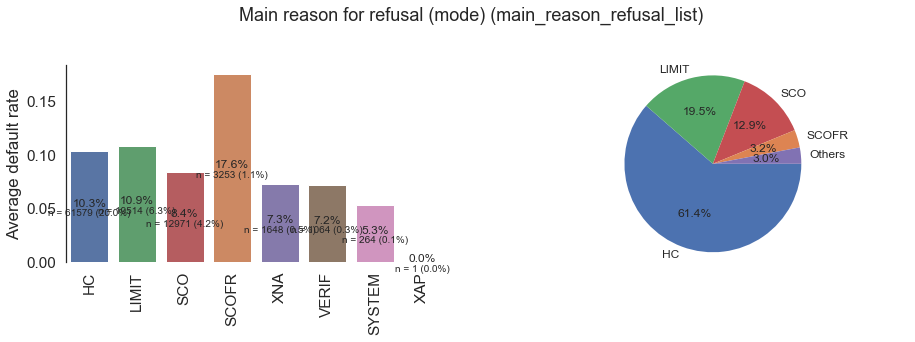

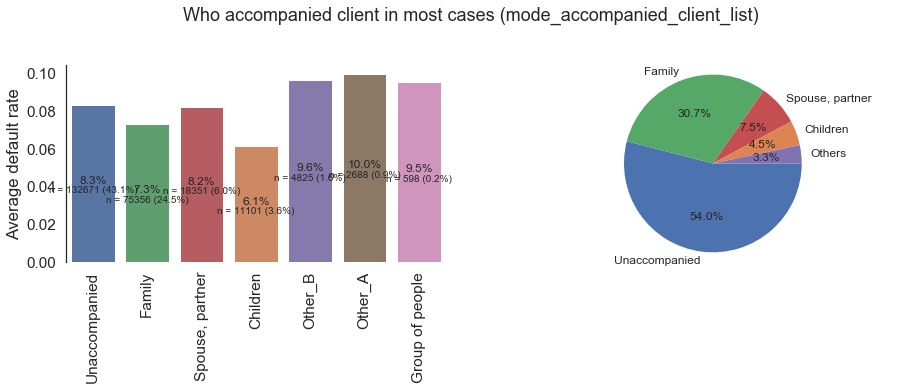

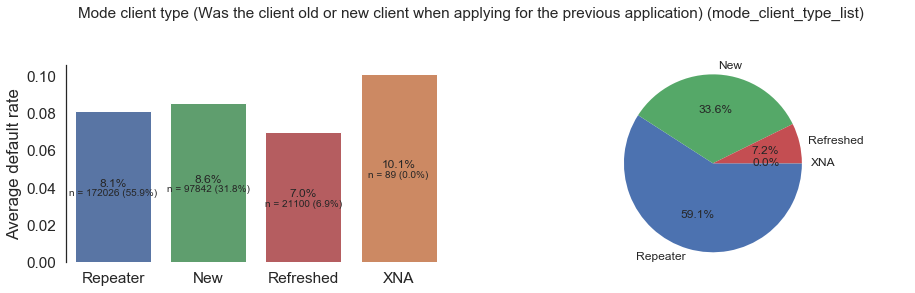

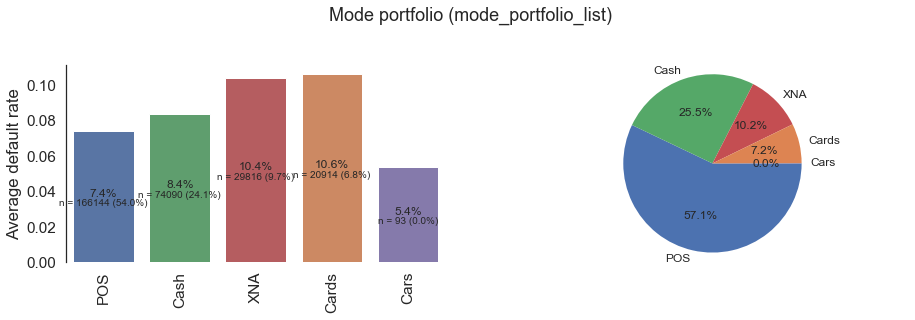

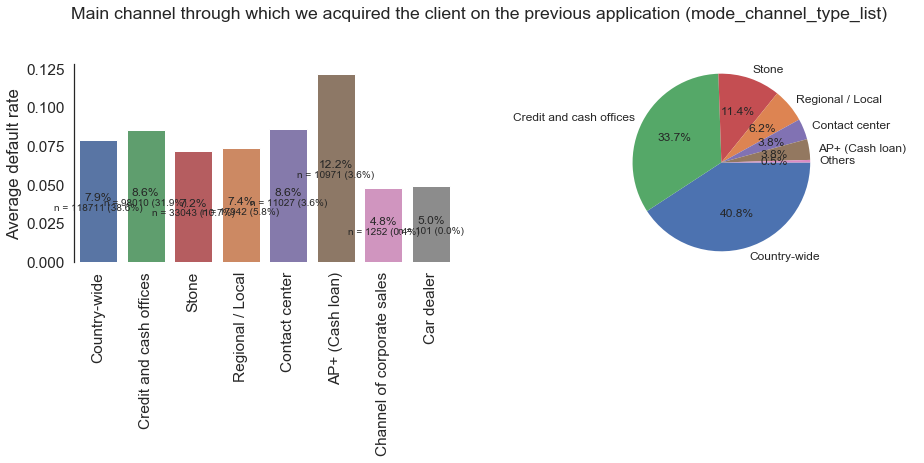

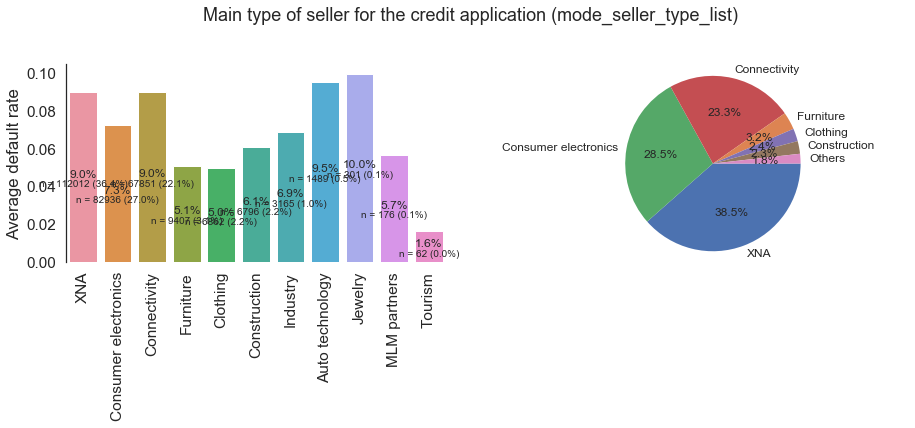

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


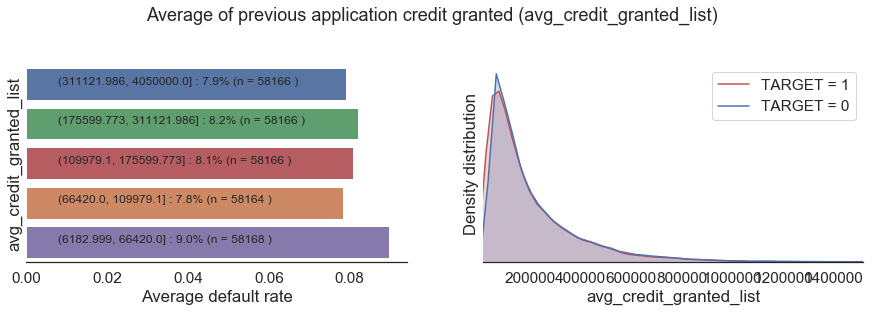

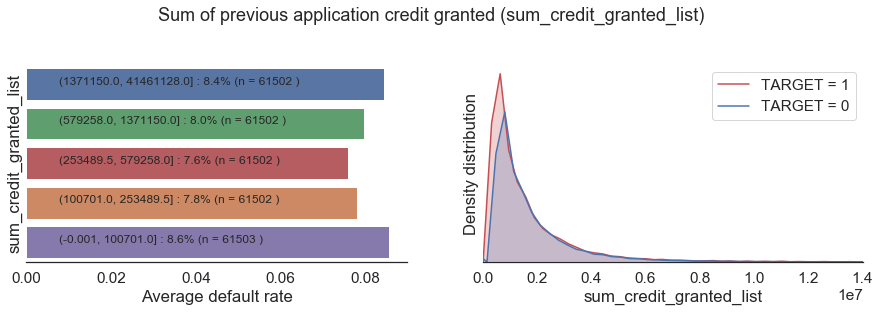

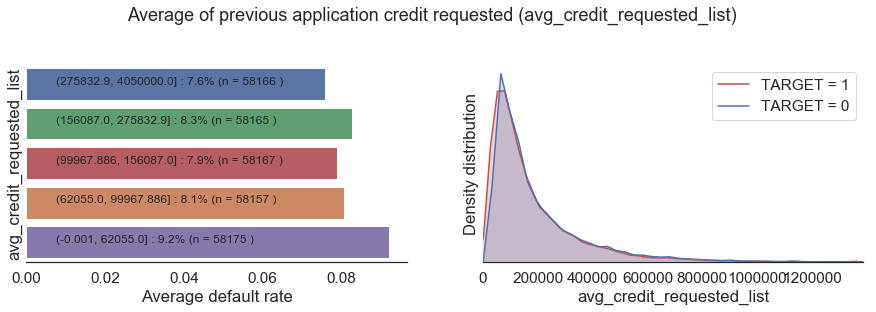

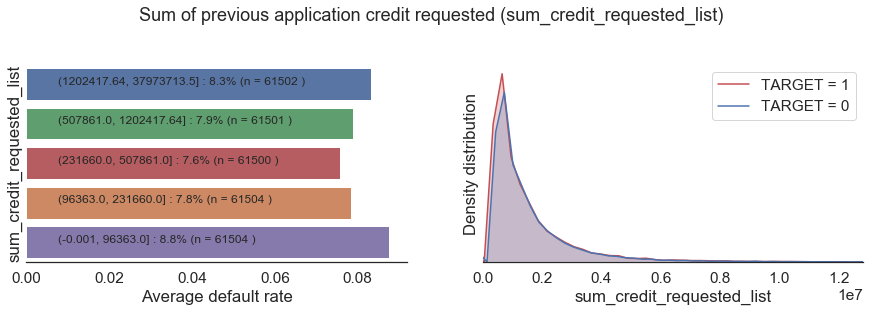

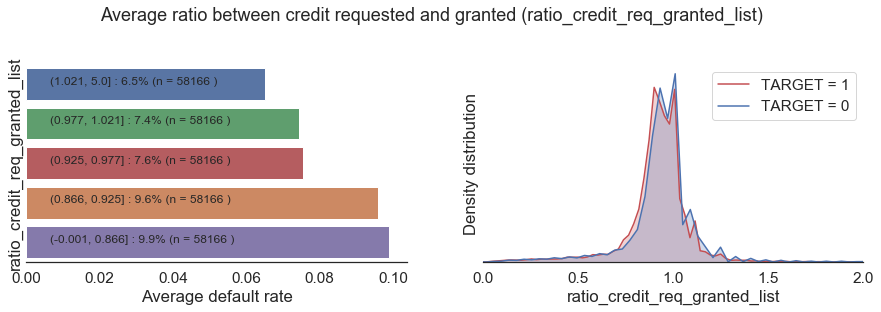

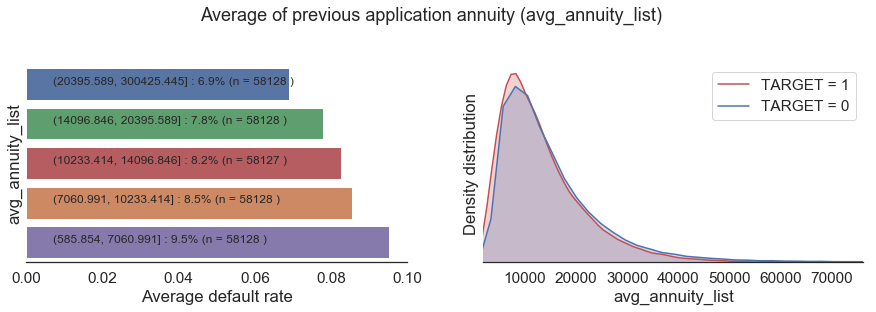

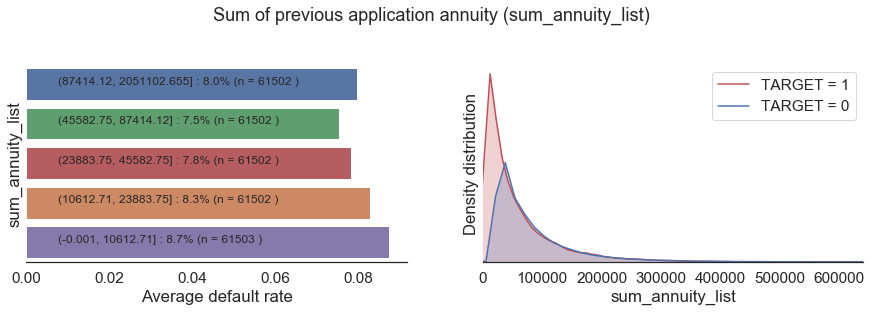

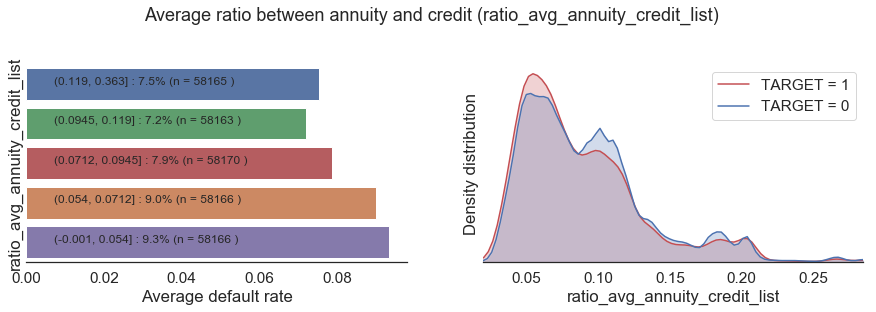

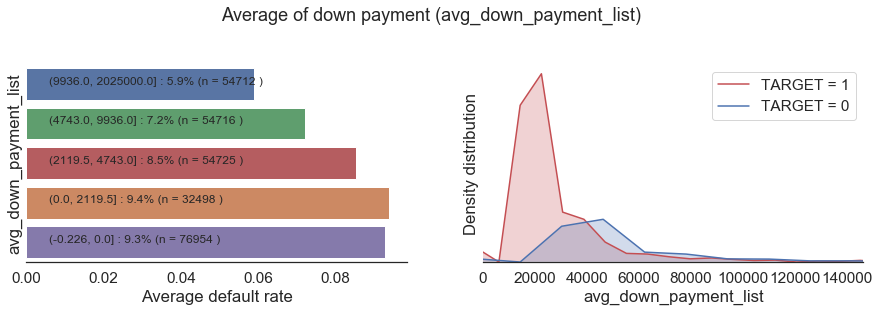

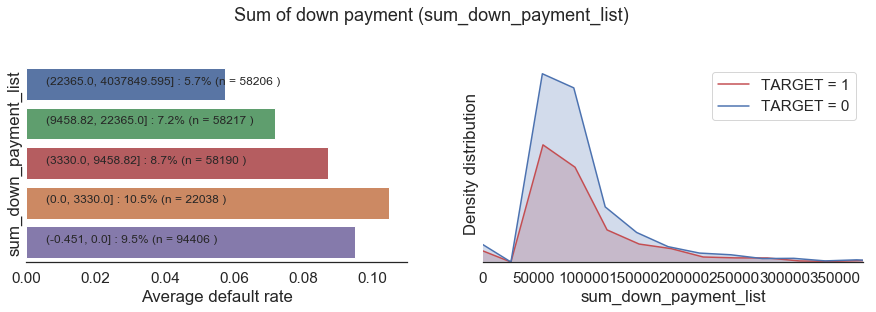

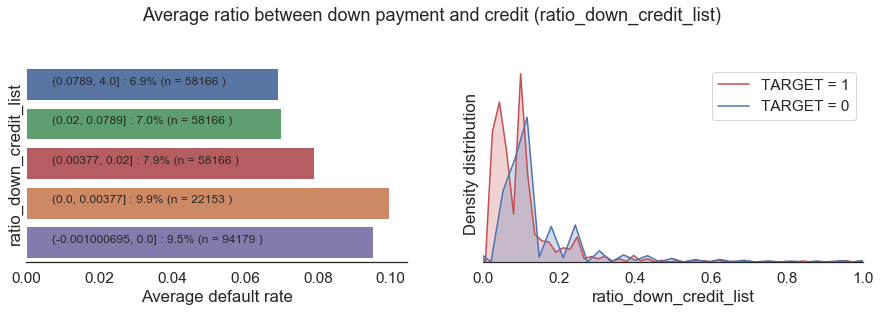

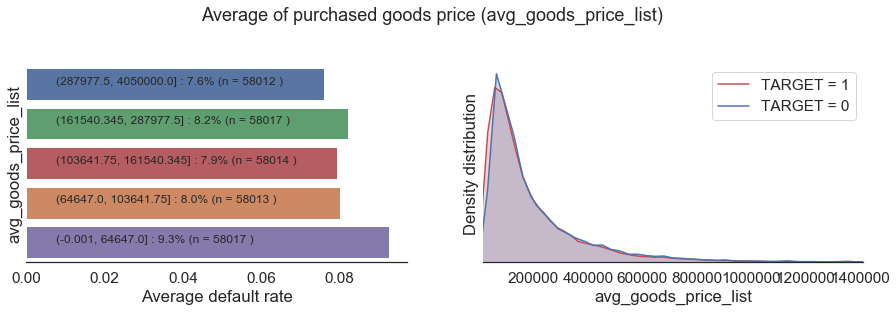

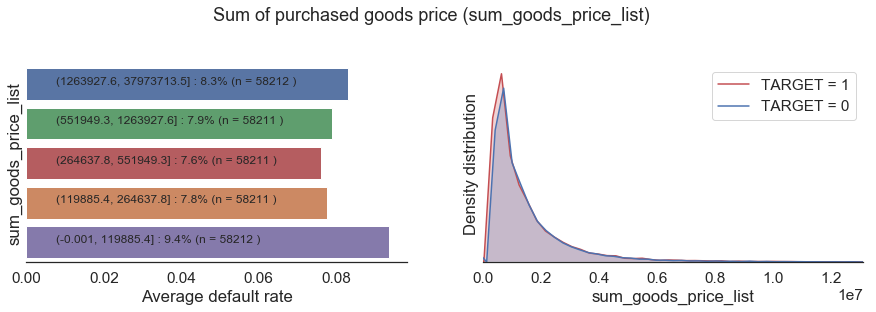

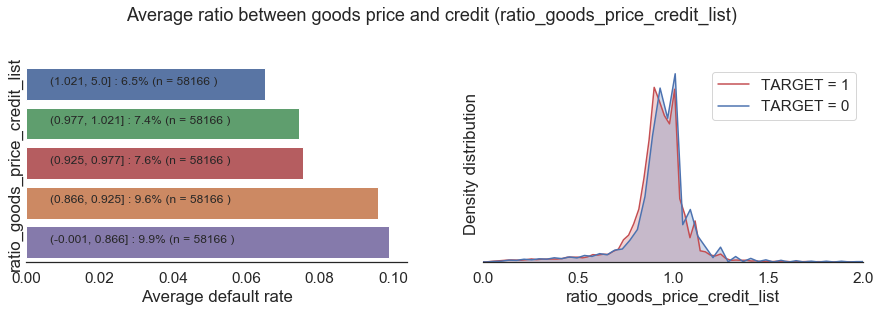

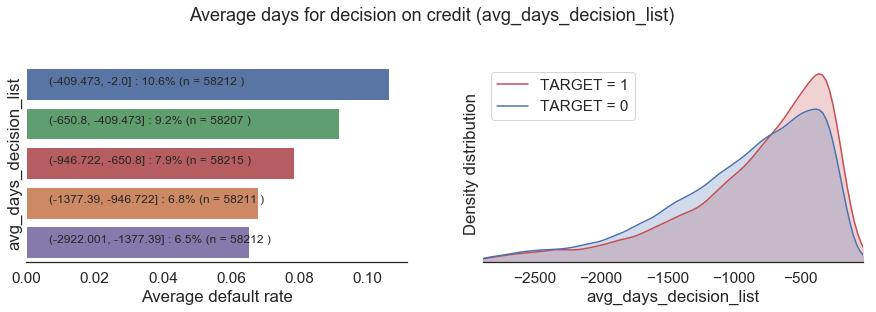

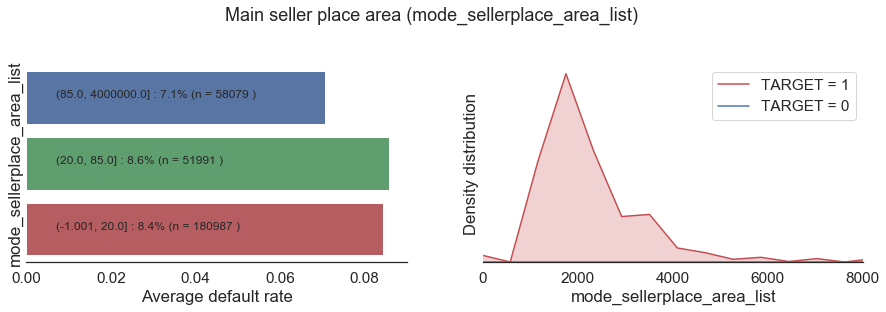

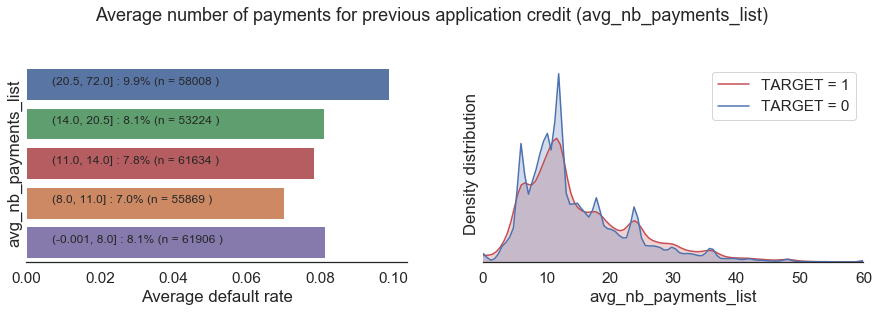

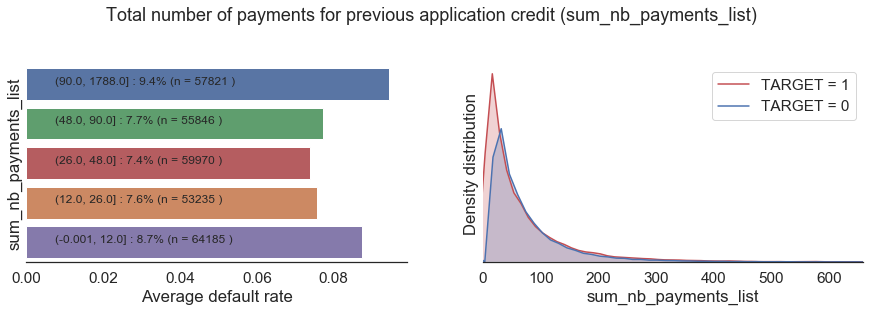

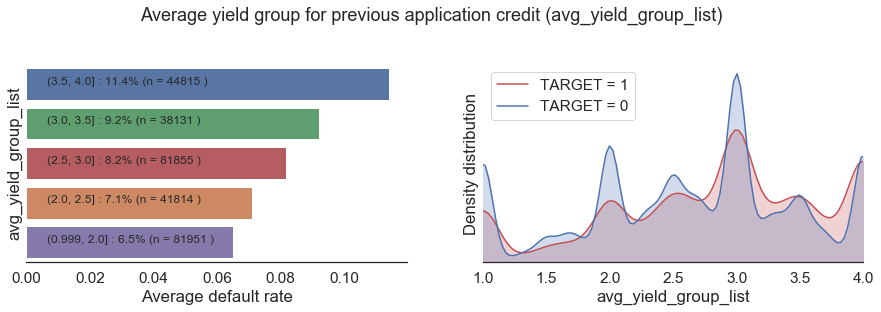

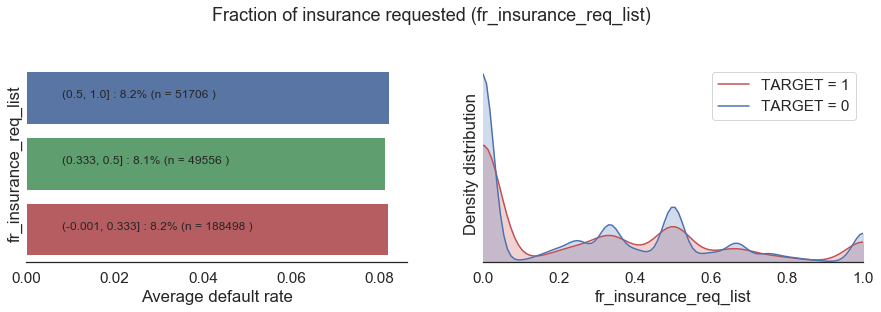

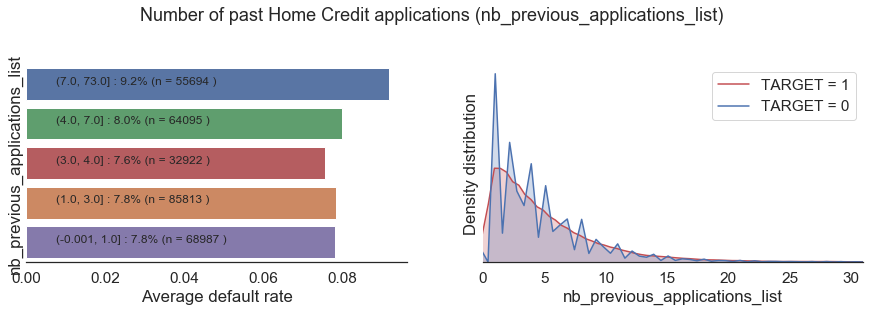

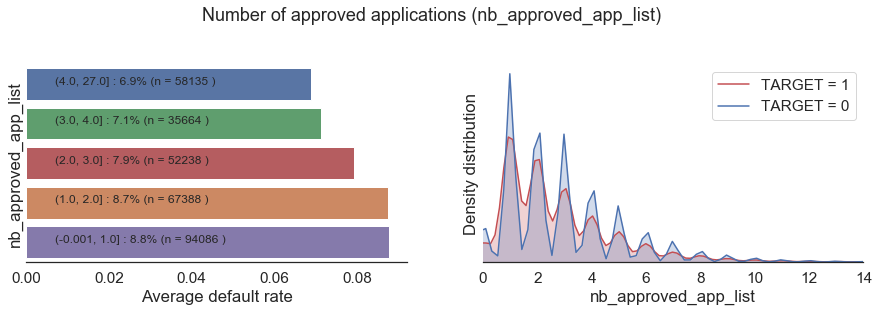

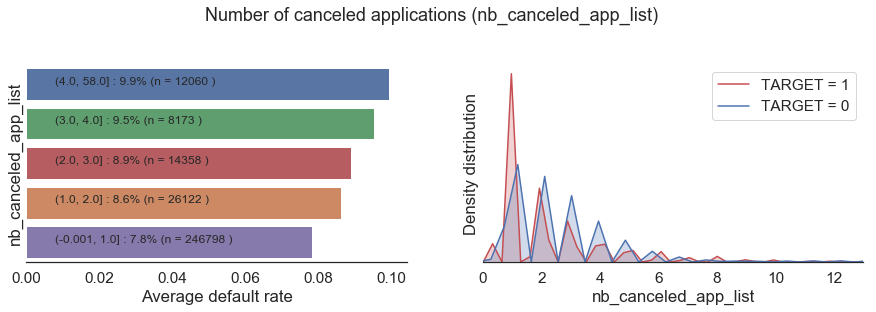

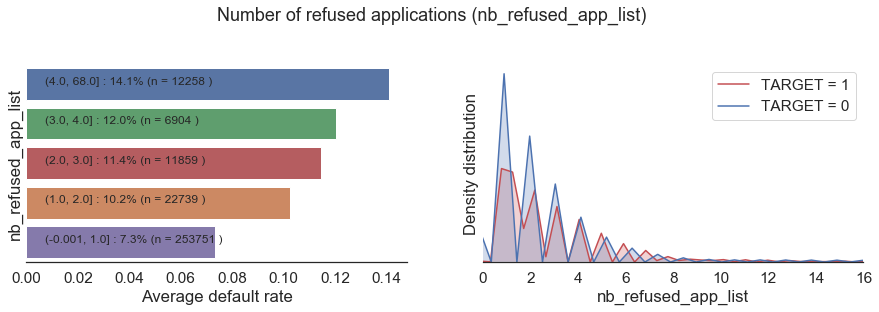

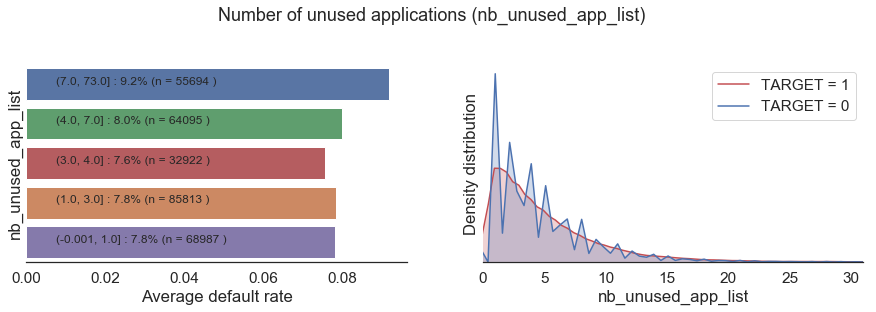

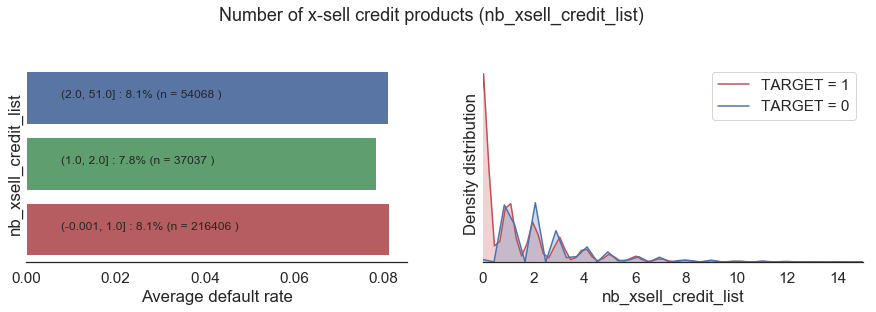

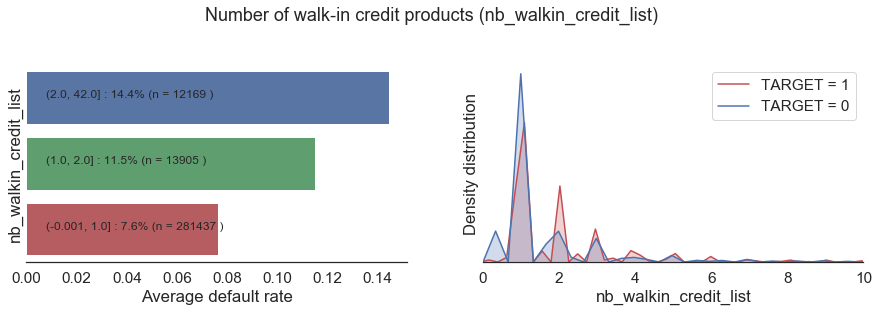

In [12]:
def display_discrete_feature(df, feature, target):
    # Creating figure and axes
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    
    # Print title
    title = homecredit_columns_description[homecredit_columns_description["Row"] == feature]["Description"].tolist()[0] + " (" + feature + ")"
    # If title is too long, reduce font size
    if len(title) <= 100:
        plt.suptitle(title, size = 18)
    else:
        plt.suptitle(title, size = 18*100/len(title))
    
    # Bar plot of mean target as a function of feature value
    df_grouped = df[[feature, target]].groupby([feature]).agg(["mean", "count"])
    # In case of non numerical categorial data, sort by value count
    if type(df_grouped.index[0]) == str:
        df_grouped = df_grouped.sort_values(by = [("TARGET", "count")], ascending = False)
    index = df_grouped.index
    height = df_grouped[("TARGET", "mean")].tolist()
    count = df_grouped[("TARGET", "count")].tolist()
    sns.barplot(index, height, ax = ax1)
    if len(count) >= 5:
        ax1.tick_params(axis='x', rotation=90, labelleft = True)
    ax1.set_xlabel("")
    ax1.set_ylabel('Average default rate')

    sns.despine(bottom=True, ax = ax1)
    # Writing target average and count for each bar plot
    for i, item in enumerate(count):
        ax1.text(x = i , y = height[i]/2, s = str(round(height[i]*100,1))+"%", size = 12, horizontalalignment='center')
        ax1.text(x = i , y = height[i]/2-np.max(height)/20, s = "n = "+str(item)+" ("+str(round(item/len(df)*100, 1))+"%)", size = 10, horizontalalignment='center')

    # Pie chart for the selected feature
    df_value_count = df[feature].value_counts()/len(df[feature].dropna())
    # In case of numerical categorial data, sort by index
    if type(df_value_count.index[0]) != str:
        df_value_count = df_value_count.sort_index()
    # If there are more than 2 categories with low count, then group in Others category
    if len(df_value_count[df_value_count < 2/100]) >= 2:
        df_value_count = df_value_count[df_value_count > 2/100]
        df_value_count["Others"] = 1 - df_value_count.sum()
    df_value_count.plot(kind="pie", autopct="%1.1f%%", ax = ax2, startangle = 0
                        , counterclock = False, textprops=dict(fontsize=12), 
                       wedgeprops = {'linewidth': 0} )
    ax2.set_ylabel("")
    ax2.axis('equal')

    plt.show()
    
    
def display_continuous_feature(df, feature, target, bins):
    # Creating figure and axes
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
   
    # Print title
    title = homecredit_columns_description[homecredit_columns_description["Row"] == feature]["Description"].tolist()[0]
    # If title is too long, reduce font size
    if len(title) <= 100:
        plt.suptitle(title+ " (" + feature + ")", size = 18)
    else:
        plt.suptitle(title+ " (" + feature + ")", size = 18*100/len(title))

    # Barplot of mean target as a function of feature value
    feature_bins = pd.qcut(df[feature], bins, duplicates = "drop")
    while len(feature_bins.unique()) <= 2:
        bins = bins * 5
        feature_bins = pd.qcut(df[feature], bins, duplicates = "drop")
    df2 = df.pivot_table(target, feature_bins).reset_index().sort_values(by = [feature], ascending = False).reset_index(drop = True)
    df3 = df.pivot_table(target, feature_bins, aggfunc='count').reset_index().sort_values(by = [feature], ascending = False).reset_index(drop = True)
    sns.barplot(y=feature, x=target, orient = "h", data = df2, ax = ax1, order = df2[feature])
    height = df2[target]
    count =  df3[target]
    ax1.set_ylabel(feature)
    ax1.set_xlabel('Average default rate')
    ax1.set_yticks([])
    for i, item in enumerate(count):
        ax1.text(y = i , x = min(height)/10, s = str(df2[feature][i]) + " : "+ str(round(height[i]*100,1))+"%" +" (n = "+str(item)+" )", size = 12, horizontalalignment='left')
    sns.despine(left=True, ax = ax1)

    # Kernel Density Estimate of the feature for both target values
    sns.kdeplot(df[df["TARGET"] == 1][feature], shade=True, color = pal.as_hex()[2], ax = ax2, label="TARGET = 1")
    sns.kdeplot(df[df["TARGET"] == 0][feature], shade=True, color = pal.as_hex()[0], ax = ax2, label="TARGET = 0")
    ax2.set_xlabel(feature)
    ax2.set_ylabel('Density distribution')
    ax2.set_yticks([])
    min_x = min(df[df["TARGET"] == 1][feature].quantile(.001), df[df["TARGET"] == 0][feature].quantile(.001))
    max_x = min(df[df["TARGET"] == 1][feature].quantile(.999), df[df["TARGET"] == 0][feature].quantile(.999))
    ax2.set_xlim([min_x, max_x])
    sns.despine(left=True, ax = ax2)
    plt.show()

for feature in discrete_features:
    display_discrete_feature(application[application["train"] == 1], feature, "TARGET")

for index, feature in enumerate(continuous_features):
    display_continuous_feature(application[application["train"] == 1], feature, "TARGET", 5)